<a href="https://colab.research.google.com/github/NithikaRamanathan/Quantum-Zeno-Effect/blob/main/ApplicationsofMediumArticle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scipy

In [ ]:
pip install qiskit

In [ ]:
pip install pylatexenc

In [ ]:
import matplotlib.pyplot as plt
import qiskit
from qiskit import QuantumCircuit, assemble
import numpy as np
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit.circuit.library import RXGate
from qiskit.circuit.library import UGate
from qiskit.circuit.library import CXGate
from scipy.interpolate import interp1d

In [ ]:
pip install qiskit qiskit-aer

In [ ]:
from qiskit_aer import Aer
sim = Aer.get_backend('aer_simulator')

In [ ]:
import numpy as np

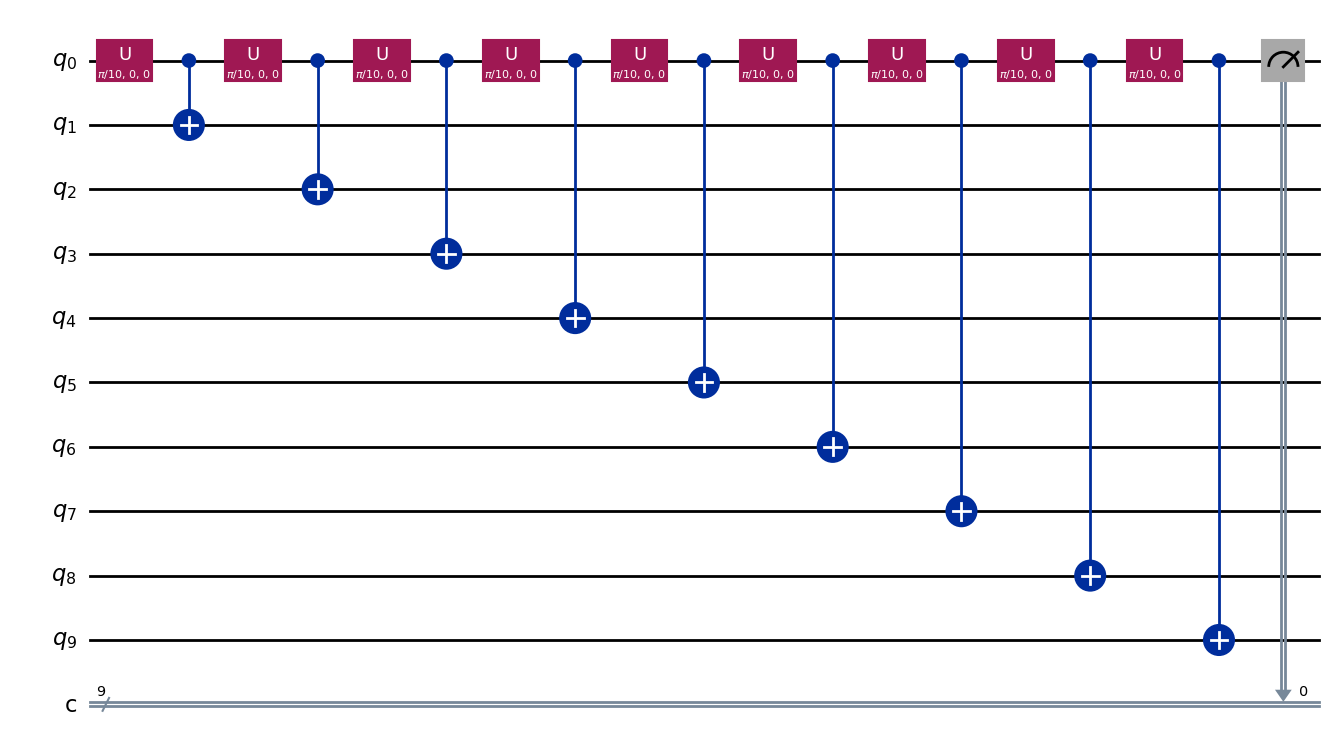

In [ ]:
time_steps = 10 # Choose the number of times to evolve the single qubit with a unitary gate - 20
theta = np.pi/(time_steps) # set parameter to determine how much the qubit's state is rotated with each timestep

qr = QuantumRegister(time_steps, 'q') # - 20
cr = ClassicalRegister(time_steps-1, 'c') # - 19
q_evolve = QuantumCircuit(qr, cr)


for time_step in range(1,time_steps):
    q_evolve.append(UGate(theta,0,0), [qr[0]]) # Add correct number of single-qubit gates to evolve the qubit's state
    if time_step < time_steps: # - 20
        q_evolve.cx(qr[0], qr[time_step])

q_evolve.measure(qr[0],cr[0])
q_evolve.draw("mpl")

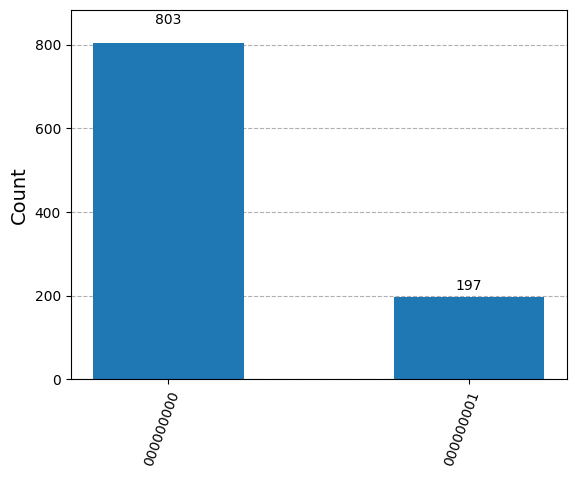

In [ ]:
job = sim.run(q_evolve, shots=1000)
result = job.result()
counts = result.get_counts(q_evolve)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [ ]:
time_steps = 6

x_values = range(0,time_steps+1)
y_values = list()

for i in range(0,time_steps+1):

    theta = np.pi/time_steps # set parameter to determine how much the qubit's state is rotated with each timestep

    qr = QuantumRegister(1, 'q')
    cr = ClassicalRegister(1, 'c')
    q_evolve = QuantumCircuit(qr, cr)

    q_evolve.x(0)

    for time_step in range(i):
       q_evolve.append(UGate(theta,0,0), [qr[0]]) # Add correct number of single-qubit gates to evolve the qubit's state
       if time_step < 6:
          q_evolve.cx(qr[0], qr[time_step])

    q_evolve.measure(qr[0],cr[0])

    shot_number=10000

    job = sim.run(q_evolve, shots=shot_number)
    result = job.result()
    counts = result.get_counts(q_evolve)
    if '1' in counts:
        y_values.append(counts['1']/shot_number)
    else:
        y_values.append(0)

plt.plot(x_values, y_values)
plt.xlabel('Time-step')
plt.ylabel('Probability of measuring 1')
plt.title('Evolution of state without Zeno effect')

In [ ]:
time_steps = 20
theta = np.pi/time_steps

qr = QuantumRegister(1, 'q')
cr = ClassicalRegister(time_steps, 'c')
q_zeno = QuantumCircuit(qr, cr)

q_zeno.x(0)

for time_step in range(time_steps):
    q_zeno.append(RXGate(theta), [qr[0]]) # Add correct number of single-qubit gates to evolve the qubit's state
    q_zeno.measure(qr[0],cr[time_step])

In [ ]:
time_steps = 20

x_values_zeno = range(0,time_steps+1)
y_values_zeno = list()

for i in range(0,time_steps+1):

    theta = np.pi/time_steps # set parameter to determine how much the qubit's state is rotated with each timestep

    qr = QuantumRegister(1, 'q')
    cr = ClassicalRegister(1, 'c')
    q_zeno = QuantumCircuit(qr, cr)

    q_zeno.x(0)

    for time_step in range(i):
        q_zeno.measure(qr[0],cr[0])
        q_zeno.append(RXGate(theta), [qr[0]]) # Add correct number of single-qubit gates to evolve the qubit's state

    q_zeno.measure(qr[0],cr[0])

    shot_number=10000

    job = sim.run(q_zeno, shots=shot_number)
    result = job.result()
    counts = result.get_counts(q_zeno)
    if '1' in counts:
        y_values_zeno.append(counts['1']/shot_number)
    else:
        y_values_zeno.append(0)

plt.plot(x_values_zeno, y_values_zeno, "g", label="with Zeno")
plt.plot(x_values, y_values,"b", label="without Zeno")
plt.xlabel('Time-step')
plt.ylabel('Probability of measuring 1')
plt.legend()
plt.title('Evolution of state with and without Zeno effect')